In [2]:
!nvidia-smi

Sat Aug 13 11:20:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py39_4.9.2-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y jupyter
!conda install -q -y google-colab -c conda-forge
!python -m ipykernel install --name "py39" --user

In [ ]:
!git clone https://github.com/ultralytics/yolov5


In [ ]:
!git clone https://github.com/seralexger/clothing-detection-dataset.git

In [ ]:
!pip install -r /content/yolov5/requirements.txt
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

In [7]:

!gdown 1LMj3f75dxbKlx7c4stLGzErsLkvNdZl2
!gdown 1z36uxTfcRW-rWMSQPwXqVhv9tPp61dg5
!gdown 1r-V_AA9aw37autPdt7UtW96YLYL12sx_

Downloading...
From: https://drive.google.com/uc?id=1LMj3f75dxbKlx7c4stLGzErsLkvNdZl2
To: /content/dataset.zip
100% 562M/562M [00:04<00:00, 118MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z36uxTfcRW-rWMSQPwXqVhv9tPp61dg5
To: /content/Create_Dataset.py
100% 2.96k/2.96k [00:00<00:00, 4.02MB/s]
Downloading...
From: https://drive.google.com/uc?id=1r-V_AA9aw37autPdt7UtW96YLYL12sx_
To: /content/Clothes.yml
100% 530/530 [00:00<00:00, 896kB/s]


In [ ]:
!unzip /content/clothing-detection-dataset/data.zip
!unzip /content/dataset.zip

In [9]:
import Create_Dataset as CD
from sklearn.model_selection import train_test_split
#create training and val datatset
images_dir = '/content/dataset/'
annotations = '/content/data/'

classes = CD.get_classes(annotations)
dataset_list = CD.get_annotations_list(annotations)

train_set, val_set = train_test_split(dataset_list, test_size = 0.1)

print(len(train_set), len(val_set))

2998 334


In [10]:
CD.Create_dataset(images_dir, annotations, train_set, "train")
CD.Create_dataset(images_dir, annotations, val_set, "test")

100%|██████████| 334/334 [00:15<00:00, 21.29it/s]


In [ ]:
!git clone https://github.com/NVIDIA/apex && cd apex && pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" . --user && cd .. && rm -rf apex

In [13]:
!gdown 1zT29G68hICaJKlicXRDaADtj3m-m9B62 

Downloading...
From: https://drive.google.com/uc?id=1zT29G68hICaJKlicXRDaADtj3m-m9B62
To: /content/yolov5x.pt
100% 174M/174M [00:01<00:00, 102MB/s] 


In [ ]:
!pip install wandb==0.12.10
!pip install clearml

In [ ]:
!clearml-init

In [18]:
!python /content/yolov5/train.py --img 640 --batch 4 --epochs 10  --data /content/Clothes.yml --cfg /content/yolov5/models/yolov5x.yaml --weights yolov5x.pt  --name yolov5x_clothing --cache

wandb: Currently logged in as: ayanansar (use `wandb login --relogin` to force relogin)
train: weights=yolov5x.pt, cfg=/content/yolov5/models/yolov5x.yaml, data=/content/Clothes.yml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=yolov5x_clothing, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-388-gf1214f2 Python-3.9.1 torch-1.12.1+cu102 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_mome

**The best mAP_0.5 for the yolov5x model = 0.435** 

**Best Precision = 0.665**

**Best Recall = 0.393**

**train/box_loss 0.03534**

**train/cls_loss 0.01697** 

**train/obj_loss 0.03095**

**val/box_loss 0.03827**

**val/cls_loss 0.01781**

**val/obj_loss 0.02362**


In [22]:
!find ../content/FashionDetect/images/test -maxdepth 1 -type f | head -50 | xargs cp -t "/content/yolov5/data/images"

In [25]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/yolov5x_clothing3/weights/last.pt \
  --img 640 --conf 0.4 --source /content/yolov5/data/images

detect: weights=['/content/yolov5/runs/train/yolov5x_clothing3/weights/last.pt'], source=/content/yolov5/data/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-388-gf1214f2 Python-3.9.1 torch-1.12.1+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86368555 parameters, 0 gradients, 204.4 GFLOPs
image 1/52 /content/yolov5/data/images/104.jpeg: 544x640 1 camisas, Done. (0.098s)
image 2/52 /content/yolov5/data/images/108.jpeg: 640x640 1 collares, 3 gafas de sols, Done. (0.053s)
image 3/52 /content/yolov5/data/images/11.jpeg: 640x640 Done. (0.053s)
image 4/52 /content/yolov5/data/images/119.jpeg: 64

In [52]:
import cv2
from pathlib import Path
import torchvision
import torch 
import matplotlib.pyplot as plt

def load_image(img_path: Path, resize=True):
  img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (500, 500), interpolation = cv2.INTER_AREA)
  return img

def show_grid(image_paths):
  images = [load_image(img) for img in image_paths]
  images = torch.as_tensor(images)
  images = images.permute(0, 3, 1, 2)
  grid_img = torchvision.utils.make_grid(images, nrow=5)
  plt.figure(figsize=(55, 30))
  plt.imshow(grid_img.permute(1, 2, 0))
  plt.axis('off');

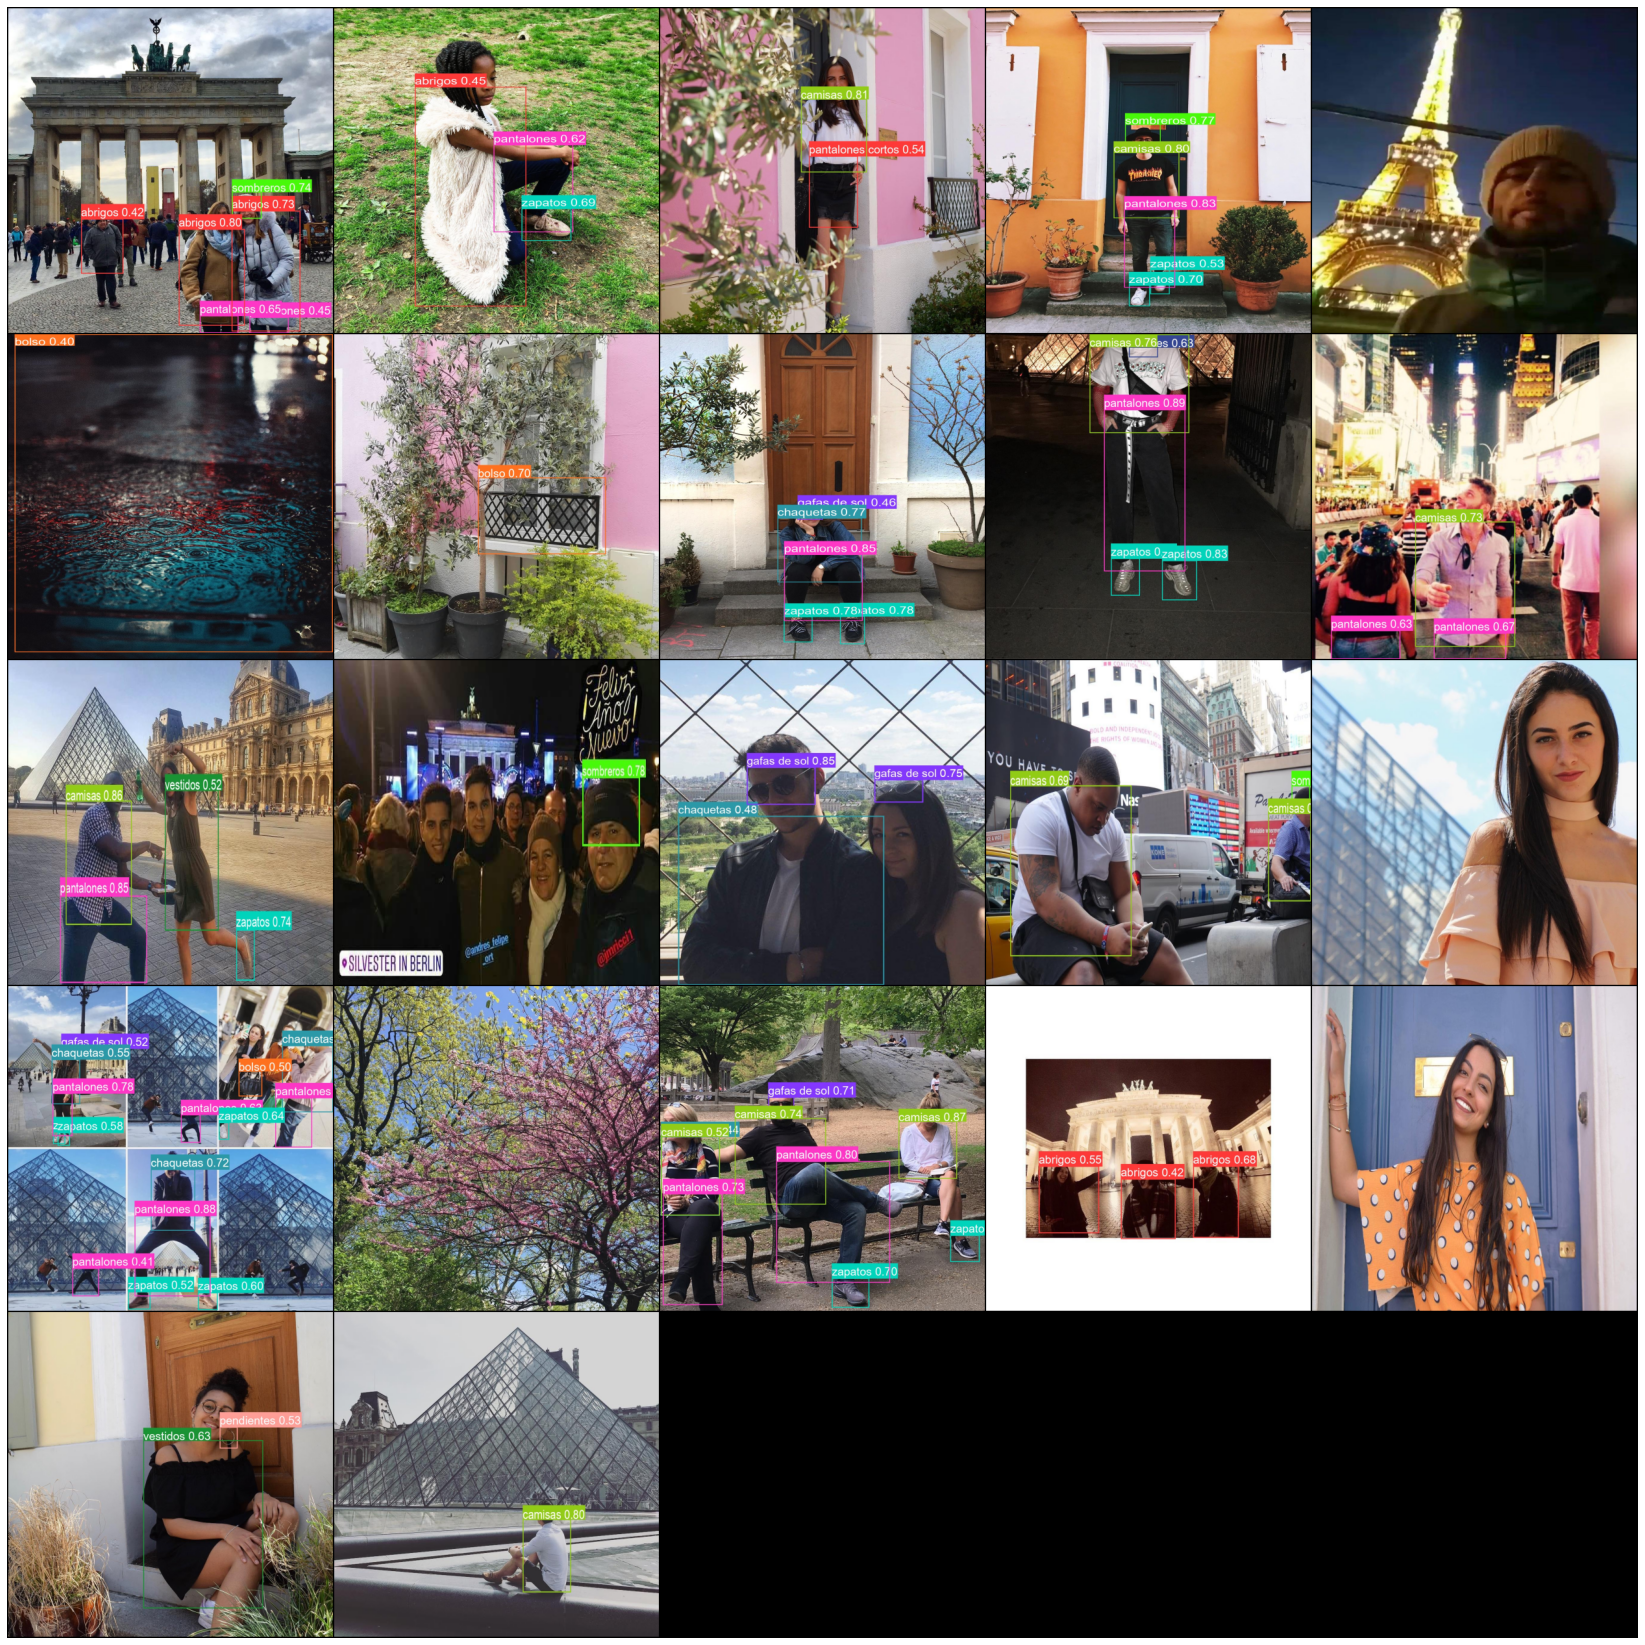

In [53]:
img_paths = list(Path("/content/yolov5/runs/detect/exp2").glob("*.jpeg"))[:22]
show_grid(img_paths)